<a href="https://colab.research.google.com/github/jssicaflores/build-a-bed-student-homelessness-eda/blob/main/notebooks/eda_student_homelessness_sy2021_22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Build-A-Bed | Exploratory Data Analysis
## Student Homelessness (SY 2021–2022)

**Purpose:**
This analysis explores district-level student homelessness data reported under the McKinney-Vento Act for the 2021–22 school year.
The goal is to identify school districts in Cameron and Willacy Counties where children may be at elevated risk of inadequate sleeping conditions, in order to better target Build-A-Bed resources and support grant applications.

**Important note:**
Student homelessness counts are used as a proxy indicator for housing and sleep instability. This analysis does not assume that every homeless student lacks a bed.


In [7]:
import pandas as pd

df = pd.read_csv("SY2122_FS118_DG655_LEA.csv")

df.head()



,School Year,State,NCES LEA ID,LEA,School,NCES SCH ID,Data Group,Data Description,Value,Numerator,Denominator,Population,Subgroup,Characteristics,Age/Grade,Academic Subject,Outcome,Program Type
0,2021-2022,ALABAMA,100005,Albertville City,NaN,NaN,655,Homeless Students Enrolled,87,NaN,NaN,Homeless Students,All Students in LEA,NaN,Kindergarten through 12th grade,NaN,NaN,NaN
1,2021-2022,ALABAMA,100005,Albertville City,NaN,NaN,655,Homeless Students Enrolled,S,NaN,NaN,Homeless Students,American Indian or Alaska Native,NaN,Kindergarten through 12th grade,NaN,NaN,NaN
2,2021-2022,ALABAMA,100005,Albertville City,NaN,NaN,655,Homeless Students Enrolled,5,NaN,NaN,Homeless Students,Black or African American,NaN,Kindergarten through 12th grade,NaN,NaN,NaN
3,2021-2022,ALABAMA,100005,Albertville City,NaN,NaN,655,Homeless Students Enrolled,65,NaN,NaN,Homeless Students,Hispanic/Latino,NaN,Kindergarten through 12th grade,NaN,NaN,NaN
4,2021-2022,ALABAMA,100005,Albertville City,NaN,NaN,655,Homeless Students Enrolled,S,NaN,NaN,Homeless Students,Two or more races,NaN,Kindergarten through 12th grade,NaN,NaN,NaN


In [8]:
#dataset size

df.shape


(113422, 18)

In [9]:
#column list

df.columns.tolist()

['School Year',
 'State',
 'NCES LEA ID',
 'LEA',
 'School',
 'NCES SCH ID',
 'Data Group',
 'Data Description',
 'Value',
 'Numerator',
 'Denominator',
 'Population',
 'Subgroup',
 'Characteristics',
 'Age/Grade',
 'Academic Subject',
 'Outcome',
 'Program Type']

In [10]:
#peek at data types

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113422 entries, 0 to 113421
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   School Year       113422 non-null  object 
 1   State             113422 non-null  object 
 2   NCES LEA ID       113422 non-null  int64  
 3   LEA               113422 non-null  object 
 4   School            0 non-null       float64
 5   NCES SCH ID       0 non-null       float64
 6   Data Group        113422 non-null  int64  
 7   Data Description  113422 non-null  object 
 8   Value             113422 non-null  object 
 9   Numerator         0 non-null       float64
 10  Denominator       0 non-null       float64
 11  Population        113422 non-null  object 
 12  Subgroup          81728 non-null   object 
 13  Characteristics   31694 non-null   object 
 14  Age/Grade         113422 non-null  object 
 15  Academic Subject  0 non-null       float64
 16  Outcome           0 

In [15]:
df['Data Description'].value_counts().head(20)


,count
Data Description,
Homeless Students Enrolled,113422


In [16]:
df['Subgroup'].value_counts().head(20)


,count
Subgroup,
All Students in LEA,13234
White,11005
Children with disabilities,10970
Hispanic/Latino,9212
Black or African American,7537
Two or more races,7060
Unaccompanied Youth,6973
English Learner,6386
American Indian or Alaska Native,3101


In [ ]:
# Need to filtered the dataset to total homeless student counts & Subgroup == "All Students in LEA"
# Will exclude subgroups (race, EL, disability, etc.) to avoid double counting.

In [17]:
#Filter to total homeless students per district

df_total = df[
    (df['Data Description'] == 'Homeless Students Enrolled') &
    (df['Subgroup'] == 'All Students in LEA')
].copy()

df_total.shape


(13234, 18)

In [18]:
# The columns we actually need
df_total = df_total[
    [
        'School Year',
        'State',
        'NCES LEA ID',
        'LEA',
        'Value'
    ]
]

In [19]:
#Rename columns
df_total = df_total.rename(columns={
    'School Year': 'school_year',
    'State': 'state',
    'NCES LEA ID': 'lea_id',
    'LEA': 'district',
    'Value': 'homeless_students'
})


In [20]:
#sanity check
df_total.head()
df_total.describe()


,lea_id
count,1.323400e+04
mean,2.836276e+06
std,1.539210e+06
min,1.000050e+05
25%,1.713538e+06
50%,2.900613e+06
75%,4.010695e+06
max,7.200030e+06


In [21]:
#convert to metric (homeless_students)

df_total['homeless_students'] = pd.to_numeric(
    df_total['homeless_students'],
    errors='coerce'
)


In [23]:
# Min, max, median homeless students per district

df_total['homeless_students'].describe()


,homeless_students
count,11478.00000
mean,108.04452
std,431.46889
min,3.00000
25%,9.00000
50%,23.00000
75%,64.00000
max,17429.00000


In [ ]:
# While the median school district reports 23 homeless students,
# a small number of districts report counts in the hundreds or thousands,
# indicating a highly uneven distribution of need.”

In [24]:
#the highest-need districts nationwide
df_total.sort_values('homeless_students', ascending=False).head(10)


,school_year,state,lea_id,district,homeless_students
28955,2021-2022,ILLINOIS,1709930,City of Chicago SD 299,17429.0
62523,2021-2022,NEVADA,3200060,CLARK COUNTY SCHOOL DISTRICT,12078.0
68130,2021-2022,NEW YORK,3600087,NEW YORK CITY GEOGRAPHIC DISTRICT #10,9286.0
23602,2021-2022,FLORIDA,1200390,MIAMI-DADE,8466.0
98876,2021-2022,TEXAS,4823640,HOUSTON ISD,8439.0
68114,2021-2022,NEW YORK,3600086,NEW YORK CITY GEOGRAPHIC DISTRICT # 9,7959.0
18000,2021-2022,CALIFORNIA,634320,San Diego Unified,7868.0
68277,2021-2022,NEW YORK,3600098,NEW YORK CITY GEOGRAPHIC DISTRICT #24,7386.0
15821,2021-2022,CALIFORNIA,622710,Los Angeles Unified,7110.0
15786,2021-2022,CALIFORNIA,622500,Long Beach Unified,6313.0


In [25]:
#filter to Texas Only
df_tx = df_total[df_total['state'] == 'TEXAS'].copy()

df_tx.shape


(929, 5)

In [26]:
#top texas districts
df_tx.sort_values('homeless_students', ascending=False).head(10)


,school_year,state,lea_id,district,homeless_students
98876,2021-2022,TEXAS,4823640,HOUSTON ISD,8439.0
97500,2021-2022,TEXAS,4816230,DALLAS ISD,3749.0
98126,2021-2022,TEXAS,4819700,FORT WORTH ISD,3081.0
96155,2021-2022,TEXAS,4808700,ARLINGTON ISD,2251.0
95963,2021-2022,TEXAS,4807830,ALIEF ISD,1988.0
101418,2021-2022,TEXAS,4838730,SAN ANTONIO ISD,1867.0
97811,2021-2022,TEXAS,4818000,ECTOR COUNTY ISD,1792.0
96032,2021-2022,TEXAS,4808130,AMARILLO ISD,1642.0
96647,2021-2022,TEXAS,4811680,BROWNSVILLE ISD,1574.0
97468,2021-2022,TEXAS,4816110,CYPRESS-FAIRBANKS ISD,1447.0


In [ ]:
# In the 2021–22 school year, Brownsville ISD ranked among the top ten Texas school districts
# for reported student homelessness,
# highlighting a significant concentration of housing and sleep instability in Cameron County.

In [27]:
#scan district names
df_tx[df_tx['district'].str.contains('BROWNSVILLE|HARLINGEN|SAN BENITO|LOS FRESNOS|RIO HONDO|LA FERIA|POINT ISABEL', case=False, na=False)]


,school_year,state,lea_id,district,homeless_students
96647,2021-2022,TEXAS,4811680,BROWNSVILLE ISD,1574.0
98663,2021-2022,TEXAS,4822530,HARLINGEN CISD,185.0
99394,2021-2022,TEXAS,4826040,LA FERIA ISD,55.0
99782,2021-2022,TEXAS,4828290,LOS FRESNOS CISD,84.0
100877,2021-2022,TEXAS,4835250,POINT ISABEL ISD,84.0
101194,2021-2022,TEXAS,4837170,RIO HONDO ISD,17.0
101434,2021-2022,TEXAS,4838790,SAN BENITO CISD,256.0


In [44]:
# county map
county_map_confirmed = {
    'HARLINGEN CISD': 'Cameron',
    'LA FERIA ISD': 'Cameron',
    'RIO HONDO ISD': 'Cameron',
    'SAN BENITO CISD': 'Cameron',
    'RAYMONDVILLE ISD': 'Willacy',
    'LYFORD CISD': 'Willacy'
}

uw_final = df_tx[df_tx['district'].isin(county_map_confirmed.keys())].copy()
uw_final['county'] = uw_final['district'].map(county_map_confirmed)

uw_final.sort_values(
    ['county', 'homeless_students'],
    ascending=[True, False]
)[['county', 'district', 'homeless_students']]


,county,district,homeless_students
101434,Cameron,SAN BENITO CISD,256.0
98663,Cameron,HARLINGEN CISD,185.0
99394,Cameron,LA FERIA ISD,55.0
101194,Cameron,RIO HONDO ISD,17.0
99850,Willacy,LYFORD CISD,72.0
101077,Willacy,RAYMONDVILLE ISD,47.0


In [42]:
missing = ['SANTA MARIA', 'SANTA ROSA', 'LASARA', 'PERLITA']

for term in missing:
    matches = df_tx[df_tx['district'].str.contains(term, case=False, na=False)]['district'].unique()
    print(term, "->", list(matches)[:10], "(matches:", len(matches), ")")


SANTA MARIA -> [] (matches: 0 )
SANTA ROSA -> [] (matches: 0 )
LASARA -> [] (matches: 0 )
PERLITA -> [] (matches: 0 )


In [46]:
#county totals
county_summary = (
    uw_final
    .groupby('county', as_index=False)
    .agg(
        total_homeless_students=('homeless_students', 'sum'),
        districts_with_data=('district', 'count'),
        avg_homeless_per_district=('homeless_students', 'mean')
    )
)

county_summary


,county,total_homeless_students,districts_with_data,avg_homeless_per_district
0,Cameron,513.0,4,128.25
1,Willacy,119.0,2,59.50


In [48]:
# Texas Median
# Texas-specific benchmarks were calculated after filtering the dataset to Texas LEAs only
# to avoid inflating or misrepresenting comparisons using national distributions

texas_median = df_tx['homeless_students'].median()
texas_median


23.0

In [49]:
county_summary['texas_median'] = texas_median

county_summary['avg_vs_tx_median'] = (
    county_summary['avg_homeless_per_district'] / texas_median
).round(1)

county_summary


,county,total_homeless_students,districts_with_data,avg_homeless_per_district,texas_median,avg_vs_tx_median
0,Cameron,513.0,4,128.25,23.0,5.6
1,Willacy,119.0,2,59.50,23.0,2.6


In [ ]:
# Cameron County

# 4 districts with published data
# 513 total homeless students
# Average per district: 128
# That is 5.6× higher than the Texas median district (23)

# Willacy County

# 2 districts with published data
# 119 total homeless students
# Average per district: 59.5
# That is 2.6× higher than the Texas median

In [50]:
#District-level ranking

uw_final = uw_final.sort_values(
    'homeless_students',
    ascending=False
)

uw_final[['county', 'district', 'homeless_students']]


,county,district,homeless_students
101434,Cameron,SAN BENITO CISD,256.0
98663,Cameron,HARLINGEN CISD,185.0
99850,Willacy,LYFORD CISD,72.0
99394,Cameron,LA FERIA ISD,55.0
101077,Willacy,RAYMONDVILLE ISD,47.0
101194,Cameron,RIO HONDO ISD,17.0


In [51]:
#Contribution share (how concentrated is the need?)

uw_final['share_of_county_total'] = (
    uw_final
    .groupby('county')['homeless_students']
    .transform(lambda x: x / x.sum())
    .round(3)
)

uw_final[['county', 'district', 'homeless_students', 'share_of_county_total']]


,county,district,homeless_students,share_of_county_total
101434,Cameron,SAN BENITO CISD,256.0,0.499
98663,Cameron,HARLINGEN CISD,185.0,0.361
99850,Willacy,LYFORD CISD,72.0,0.605
99394,Cameron,LA FERIA ISD,55.0,0.107
101077,Willacy,RAYMONDVILLE ISD,47.0,0.395
101194,Cameron,RIO HONDO ISD,17.0,0.033


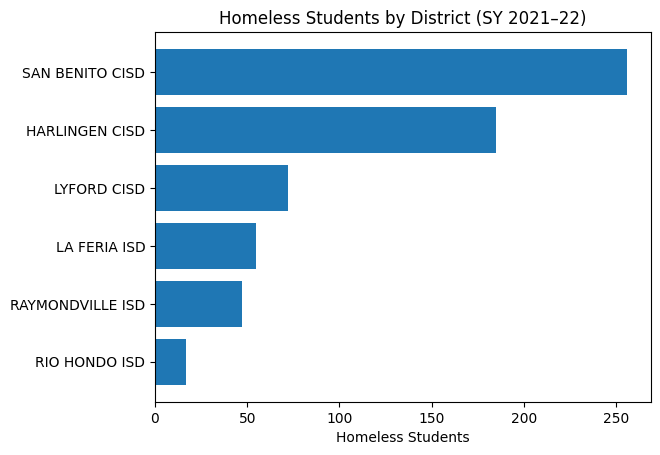

In [52]:
#visual EDA

import matplotlib.pyplot as plt

plt.figure()
plt.barh(
    uw_final['district'],
    uw_final['homeless_students']
)
plt.xlabel('Homeless Students')
plt.title('Homeless Students by District (SY 2021–22)')
plt.gca().invert_yaxis()
plt.show()


In [53]:
#districts to Texas Median

uw_final['above_tx_median'] = uw_final['homeless_students'] > texas_median

uw_final[['district', 'homeless_students', 'above_tx_median']]


,district,homeless_students,above_tx_median
101434,SAN BENITO CISD,256.0,True
98663,HARLINGEN CISD,185.0,True
99850,LYFORD CISD,72.0,True
99394,LA FERIA ISD,55.0,True
101077,RAYMONDVILLE ISD,47.0,True
101194,RIO HONDO ISD,17.0,False


In [55]:
#distribution check

uw_final['homeless_students'].describe()


,homeless_students
count,6.000000
mean,105.333333
std,93.698808
min,17.000000
25%,49.000000
50%,63.500000
75%,156.750000
max,256.000000


In [ ]:
#no conclusion. just patterns

### EDA Observations (Draft)
- Homeless student counts vary widely across districts in the service area.
- A small number of districts account for a large share of county totals.
- 5 of the 6 districts exceed the Texas median district count.


In [56]:
dashboard_df = uw_final.copy()

dashboard_df['above_tx_median'] = dashboard_df['homeless_students'] > texas_median

dashboard_df = dashboard_df[
    [
        'county',
        'district',
        'homeless_students',
        'share_of_county_total',
        'above_tx_median'
    ]
]

dashboard_df


,county,district,homeless_students,share_of_county_total,above_tx_median
101434,Cameron,SAN BENITO CISD,256.0,0.499,True
98663,Cameron,HARLINGEN CISD,185.0,0.361,True
99850,Willacy,LYFORD CISD,72.0,0.605,True
99394,Cameron,LA FERIA ISD,55.0,0.107,True
101077,Willacy,RAYMONDVILLE ISD,47.0,0.395,True
101194,Cameron,RIO HONDO ISD,17.0,0.033,False


In [59]:
dashboard_df.to_csv("build_a_bed_eda_sy2021_22.csv", index=False)


In [60]:
#Create the percentile

df_tx['tx_percentile'] = (
    df_tx['homeless_students']
    .rank(pct=True)
    .round(3)
)


In [62]:
#attach percentiles to your United Way districts

uw_final = uw_final.merge(
    df_tx[['district', 'tx_percentile']],
    on='district',
    how='left'
)

uw_final


,school_year,state,lea_id,district,homeless_students,county,share_of_county_total,above_tx_median,tx_percentile
0,2021-2022,TEXAS,4838790,SAN BENITO CISD,256.0,Cameron,0.499,True,0.904
1,2021-2022,TEXAS,4822530,HARLINGEN CISD,185.0,Cameron,0.361,True,0.876
2,2021-2022,TEXAS,4828620,LYFORD CISD,72.0,Willacy,0.605,True,0.764
3,2021-2022,TEXAS,4826040,LA FERIA ISD,55.0,Cameron,0.107,True,0.718
4,2021-2022,TEXAS,4836540,RAYMONDVILLE ISD,47.0,Willacy,0.395,True,0.684
5,2021-2022,TEXAS,4837170,RIO HONDO ISD,17.0,Cameron,0.033,False,0.420


In [63]:
#update dashboard

dashboard_df = uw_final[
    [
        'county',
        'district',
        'homeless_students',
        'share_of_county_total',
        'tx_percentile',
        'above_tx_median'
    ]
]

dashboard_df.to_csv("build_a_bed_eda_sy2021_22_v2.csv", index=False)
